## Name : Tejas Sinroja
## Task - 3 : Car Price Prediction with Machine Learning

### 1. Importing all the necessary dependencies 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.io as plio
plio.templates
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor

from warnings import filterwarnings
filterwarnings(action='ignore')

### 2. Exploring the dataset

In [2]:
data = pd.read_csv('car price prediction.zip')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### Finding any duplicates if present

In [4]:
duplicate_rows = data[data.duplicated(keep=False)]
duplicate_rows

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [5]:
duplicated_rows = data[data.duplicated(keep='first')]
duplicated_rows

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


#### Removing the duplicate rows from the dataset

In [6]:
data_cleaned = data.drop(duplicated_rows.index)

In [7]:
data = data_cleaned

In [8]:
data.Year.value_counts()

Year
2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

In [9]:
year = data.Year.value_counts().keys()
no_cars_sold = data.Year.value_counts().values
labels = [str(val) for val in no_cars_sold]

fig = px.bar(x=year, y=no_cars_sold, text=labels, title='Year vs No. of Cars Sold', template='plotly', color_discrete_sequence=['darkviolet'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='no_cars_sold')
fig.update_xaxes(title_text='Year')

# Show the plot
fig.show()


In [10]:
car_name = data.Car_Name.value_counts().head(25).keys()
cars_sold = data.Car_Name.value_counts().head(25).values
labels = [str(val) for val in cars_sold]

fig = px.bar(x=car_name, y=cars_sold, text=labels, title='Top 25 Car Name vs No. of Cars Sold', template='plotly', color_discrete_sequence=['aqua'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars Sold')
fig.update_xaxes(title_text='Car Name')

# Show the plot
fig.show()

In [11]:
data.Fuel_Type.value_counts().head(25)

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

In [12]:
fuel_type = data.Fuel_Type.value_counts().keys()
cars_count = data.Fuel_Type.value_counts().values
labels = [str(val) for val in cars_count]

fig = px.bar(x=fuel_type, y=cars_count, text=labels, title='Fuel Type vs Cars count', template='plotly', color_discrete_sequence=['orange'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars')
fig.update_xaxes(title_text='Fuel Type')

# Show the plot
fig.show()

In [13]:
selling_type = data.Selling_type.value_counts().keys()
cars_count = data.Selling_type.value_counts().values
labels = [str(val) for val in cars_count]

fig = px.bar(x=selling_type, y=cars_count, text=labels, title='Selling Type vs Cars count', template='plotly', color_discrete_sequence=['yellow'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars')
fig.update_xaxes(title_text='Selling Type')

# Show the plot
fig.show()

In [14]:
transmission_type = data.Transmission.value_counts().keys()
cars_count = data.Transmission.value_counts().values
labels = [str(val) for val in cars_count]

fig = px.bar(x=transmission_type, y=cars_count, text=labels, title='Transmission(change of gear) Type vs Cars count', template='plotly', color_discrete_sequence=['red'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars')
fig.update_xaxes(title_text='Transmission Type')

# Show the plot
fig.show()

In [15]:
ownership_type = data.Owner.value_counts().keys()
cars_count = data.Owner.value_counts().values
labels = [str(val) for val in cars_count]

fig = px.bar(x=ownership_type, y=cars_count, text=labels, title='Ownership Type vs Cars count', template='plotly', color_discrete_sequence=['gold'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars')
fig.update_xaxes(title_text='Ownership Type')

# Show the plot
fig.show()

#### Changing the catergorical columns Fuel_Type, Selling_Type, Transmission and Owner Type to Numerical columns

In [16]:
# Changing Fuel Type column : Petrol -> 0, Diesel -> 1 and CNG -> 2
category_mapping = {'Petrol': 0, 'Diesel': 1, 'CNG': 2}
data['Fuel_Type_encoded'] = data['Fuel_Type'].map(category_mapping)

In [17]:
data.Fuel_Type_encoded.value_counts()

Fuel_Type_encoded
0    239
1     58
2      2
Name: count, dtype: int64

In [18]:
fuel_type = data.Fuel_Type_encoded.value_counts().keys()
cars_count = data.Fuel_Type_encoded.value_counts().values
labels = [str(val) for val in cars_count]

fig = px.bar(x=fuel_type, y=cars_count, text=labels, title='Fuel Type(encoded) vs Cars count', template='plotly', color_discrete_sequence=['orange'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars')
fig.update_xaxes(title_text='Fuel Type(encoded)')

# Show the plot
fig.show()

In [19]:
# Changing Selling_Type column : Dealer -> 0, Individual -> 1
category_mapping = {'Dealer': 0, 'Individual': 1}
data['Selling_type_encoded'] = data['Selling_type'].map(category_mapping)

In [20]:
data.Selling_type_encoded.value_counts()

Selling_type_encoded
0    193
1    106
Name: count, dtype: int64

In [21]:
selling_type = data.Selling_type_encoded.value_counts().keys()
cars_count = data.Selling_type_encoded.value_counts().values
labels = [str(val) for val in cars_count]

fig = px.bar(x=selling_type, y=cars_count, text=labels, title='Selling Type(encoded) vs Cars count', template='plotly', color_discrete_sequence=['yellow'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars(encoded)')
fig.update_xaxes(title_text='Selling Type')

# Show the plot
fig.show()

In [22]:
# Changing Transmission column : Manual -> 0, Automatic -> 1
category_mapping = {'Manual': 0, 'Automatic': 1}
data['Transmission_encoded'] = data['Transmission'].map(category_mapping)

In [23]:
data.Transmission_encoded.value_counts()

Transmission_encoded
0    260
1     39
Name: count, dtype: int64

In [24]:
transmission_type = data.Transmission_encoded.value_counts().keys()
cars_count = data.Transmission_encoded.value_counts().values
labels = [str(val) for val in cars_count]

fig = px.bar(x=transmission_type, y=cars_count, text=labels, title='Transmission(change of gear)(encoded) Type vs Cars count', template='plotly', color_discrete_sequence=['red'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars')
fig.update_xaxes(title_text='Transmission Type(encoded)')

# Show the plot
fig.show()

In [25]:
# Changing Owner Type column : 0 -> 0, 1 -> 1 and 3 -> 2
category_mapping = {0: 0, 1: 1, 3: 2}
data['Owner_encoded'] = data['Owner'].map(category_mapping)

In [26]:
data.Owner_encoded.value_counts()

Owner_encoded
0    288
1     10
2      1
Name: count, dtype: int64

In [27]:
ownership_type = data.Owner_encoded.value_counts().keys()
cars_count = data.Owner_encoded.value_counts().values
labels = [str(val) for val in cars_count]

fig = px.bar(x=ownership_type, y=cars_count, text=labels, title='Ownership Type(encoded) vs Cars count', template='plotly', color_discrete_sequence=['gold'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars')
fig.update_xaxes(title_text='Ownership Type(encoded)')

# Show the plot
fig.show()

In [28]:
selected_columns = ['Car_Name','Year','Selling_Price','Present_Price','Driven_kms','Fuel_Type_encoded','Selling_type_encoded','Transmission_encoded','Owner_encoded']

In [29]:
new_data = data[selected_columns]

In [30]:
new_data
#new_data.to_csv('cars price encoded.csv', index=False)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type_encoded,Selling_type_encoded,Transmission_encoded,Owner_encoded
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [31]:
new_data.iloc[:,1:].corr()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type_encoded,Selling_type_encoded,Transmission_encoded,Owner_encoded
Year,1.000000,0.234369,-0.053167,-0.525714,0.046210,-0.036820,-0.003434,-0.170694
Selling_Price,0.234369,1.000000,0.876305,0.028566,0.500292,-0.553851,0.348869,-0.096019
Present_Price,-0.053167,0.876305,1.000000,0.205224,0.431887,-0.511779,0.334326,-0.018158
Driven_kms,-0.525714,0.028566,0.205224,1.000000,0.167287,-0.101030,0.163881,0.061924
Fuel_Type_encoded,0.046210,0.500292,0.431887,0.167287,1.000000,-0.347922,0.068618,-0.055526
Selling_type_encoded,-0.036820,-0.553851,-0.511779,-0.101030,-0.347922,1.000000,-0.058669,0.123165
Transmission_encoded,-0.003434,0.348869,0.334326,0.163881,0.068618,-0.058669,1.000000,0.020306
Owner_encoded,-0.170694,-0.096019,-0.018158,0.061924,-0.055526,0.123165,0.020306,1.000000


<Axes: >

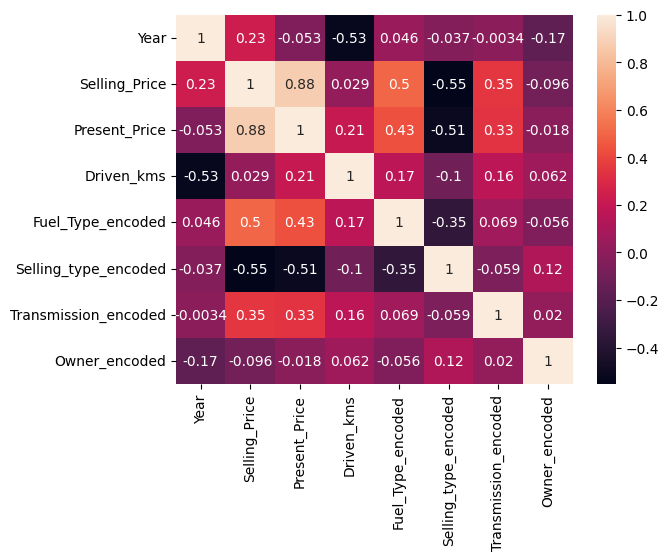

In [32]:
sns.heatmap(new_data.iloc[:,1:].corr(), annot=True)

#### From the above correlation plot we can infer the following :-
#### A -> Selling_Price is influenced by :<br> (i) Present_price by a score of 0.88
####                                                              (ii) Fuel_Type_encoded by a score of 0.5
####                                                              (iii) Transmission_type by a score of 0.35

#### B -> Present_Price is influenced by : <br> (i) Selling_price by a score of 0.88
####                                                              (ii) Fuel_Type_encoded by a score of 0.43
####                                                              (iii) Transmission_type by a score of 0.33


### 3. Analyzing the distribution using histogram plots

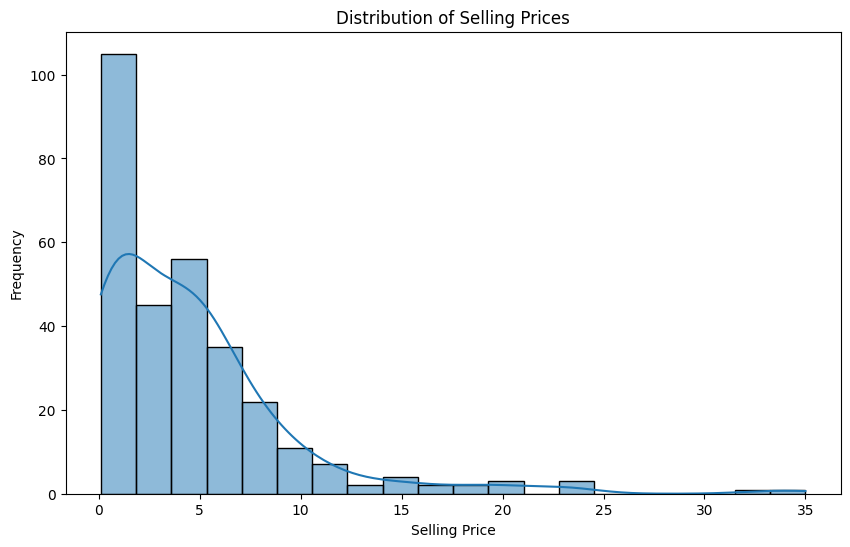

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(new_data['Selling_Price'], bins=20, kde=True)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()

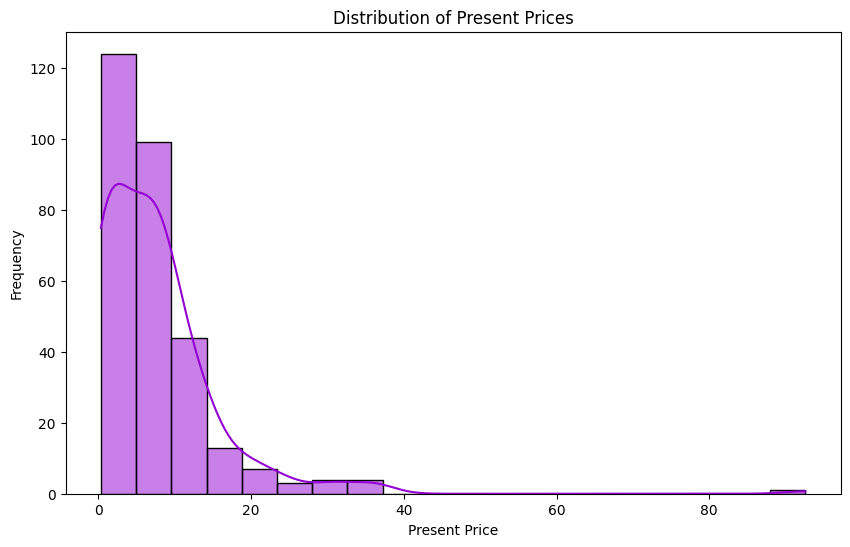

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(new_data['Present_Price'], bins=20, kde=True, color='darkviolet')
plt.xlabel('Present Price')
plt.ylabel('Frequency')
plt.title('Distribution of Present Prices')
plt.show()

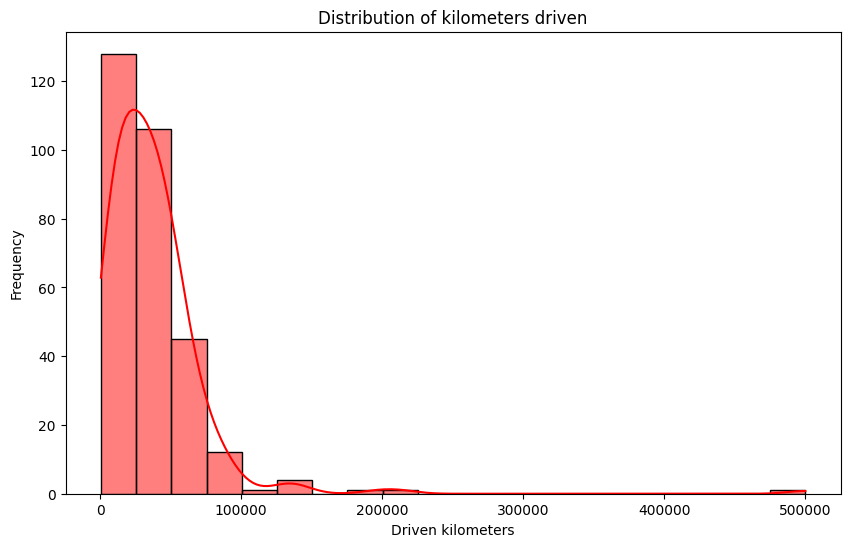

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(new_data['Driven_kms'], bins=20, kde=True, color='red')
plt.xlabel('Driven kilometers')
plt.ylabel('Frequency')
plt.title('Distribution of kilometers driven')
plt.show()

### 4. Preparing the data for Modelling

#### Since, we need to predict the price(selling price) of the car using the features of the given dataset

In [36]:
x_data = new_data.drop(['Car_Name','Selling_Price'],axis=1)
y_data = new_data['Selling_Price']

In [37]:
x_data

,Year,Present_Price,Driven_kms,Fuel_Type_encoded,Selling_type_encoded,Transmission_encoded,Owner_encoded
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [38]:
y_data

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

#### 5. Training the Models using the above data

#### (A) -> (i) Training using Linear Regression Model

In [40]:
model_1 = LinearRegression()
model_1.fit(x_train, y_train)

LinearRegression()

#### (ii) Predicting using Linear Regression Model

In [41]:
y_pred_1 = model_1.predict(x_test)

#### (iii) Evaluting the performance by Linear Regression Model

In [42]:
mse = mean_squared_error(y_test, y_pred_1)
r2 = r2_score(y_test, y_pred_1)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 3.9892656538353473
R-Squared score is : 0.8157934269113378


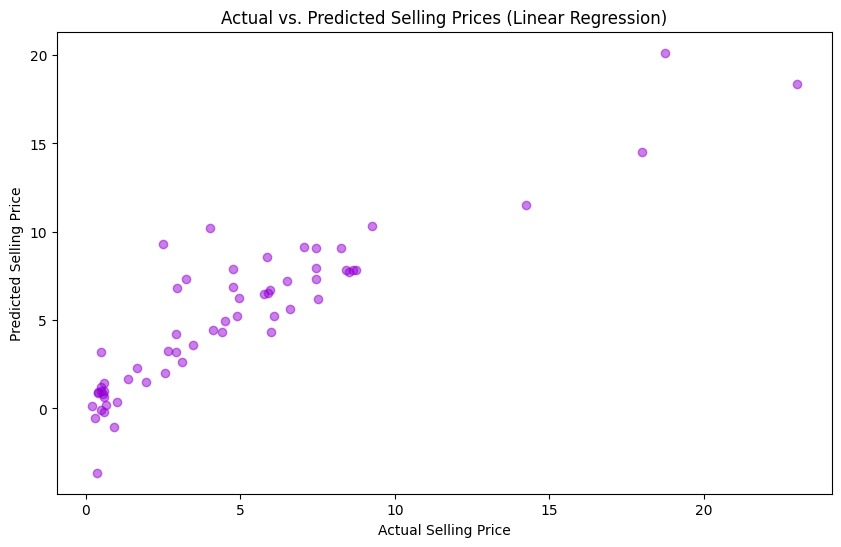

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_1, alpha=0.5, color='darkviolet')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()

#### (B) -> (i) Training using the Random Forest Regression Model

In [44]:
model_2 = RandomForestRegressor() 
model_2.fit(x_train, y_train) 

RandomForestRegressor()

#### (ii) Predicting using Random Forest Regression Model

In [45]:
y_pred_2 = model_2.predict(x_test)

#### (iii) Evaluting the performance by Random Forest Regression Model

In [46]:
mse = mean_squared_error(y_test, y_pred_2)
r2 = r2_score(y_test, y_pred_2)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 2.417520623833332
R-Squared score is : 0.8883696328773287


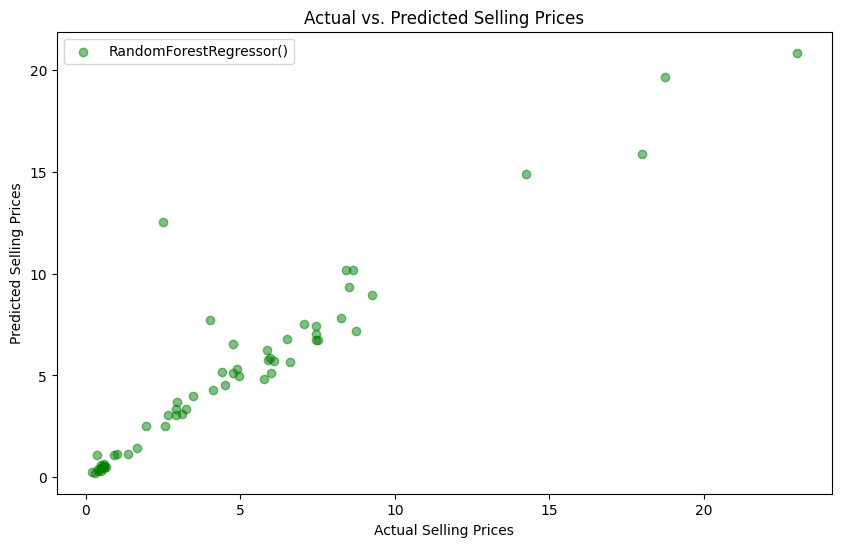

In [47]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_2, label=model_2, alpha=0.5, color='green')

plt.xlabel("Actual Selling Prices")
plt.ylabel("Predicted Selling Prices")
plt.title("Actual vs. Predicted Selling Prices")
plt.legend()
plt.show()

#### (C) -> (i) Training using the Ridge Regression Model

In [48]:
model_3 = Ridge() 
model_3.fit(x_train, y_train) 

Ridge()

#### (ii) Predicting using Ridge Regression Model

In [49]:
y_pred_3 = model_3.predict(x_test)

#### (iii) Evaluating the performance by Ridge Regression Model

In [50]:
mse = mean_squared_error(y_test, y_pred_3)
r2 = r2_score(y_test, y_pred_3)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 3.943966351960154
R-Squared score is : 0.8178851475150323


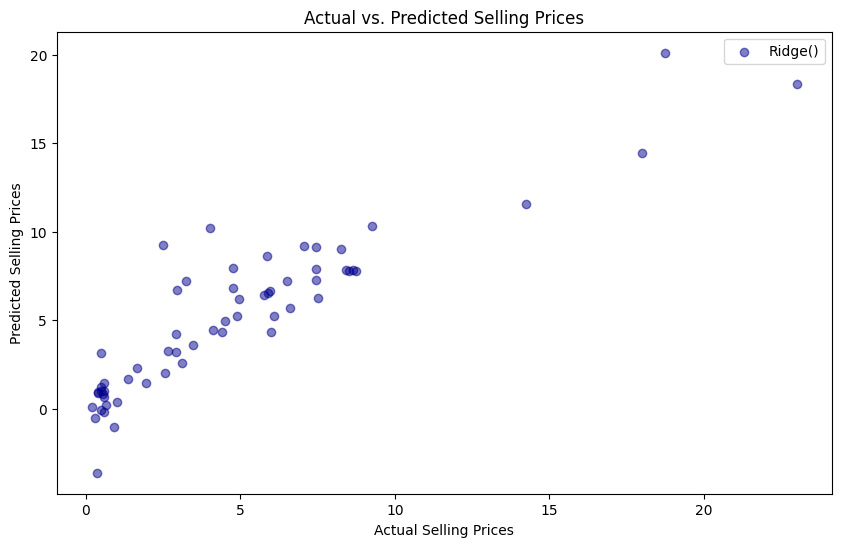

In [51]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_3, label=model_3, alpha=0.5, color='darkblue')

plt.xlabel("Actual Selling Prices")
plt.ylabel("Predicted Selling Prices")
plt.title("Actual vs. Predicted Selling Prices")
plt.legend()
plt.show()

#### (D) -> (i) Training using the Lasso Regression Model

In [52]:
model_4 = Lasso() 
model_4.fit(x_train, y_train) 

Lasso()

#### (ii) Predicting using the Lasso Regression Model

In [53]:
y_pred_4 = model_4.predict(x_test)

#### (iii) Evaluating the performance by Lasso Regression Model

In [54]:
mse = mean_squared_error(y_test, y_pred_4)
r2 = r2_score(y_test, y_pred_4)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 4.5856467860373975
R-Squared score is : 0.7882551945271251


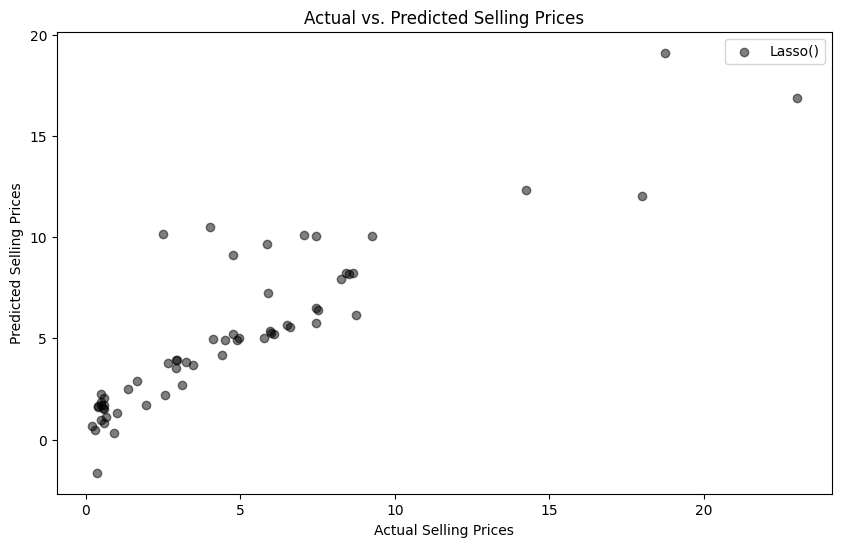

In [55]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_4, label=model_4, alpha=0.5, color='black')

plt.xlabel("Actual Selling Prices")
plt.ylabel("Predicted Selling Prices")
plt.title("Actual vs. Predicted Selling Prices")
plt.legend()
plt.show()

#### (E) -> (i) Training using the ElasticNet Regression Model

In [56]:
model_5 = ElasticNet() 
model_5.fit(x_train, y_train) 

ElasticNet()

#### (ii) Predicting using the ElasticNet Regression Model

In [57]:
y_pred_5 = model_5.predict(x_test)

#### (iii) Evaluating the performance by the ElasticNet Regression Model

In [58]:
mse = mean_squared_error(y_test, y_pred_5)
r2 = r2_score(y_test, y_pred_5)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 4.448352568614632
R-Squared score is : 0.7945948318165151


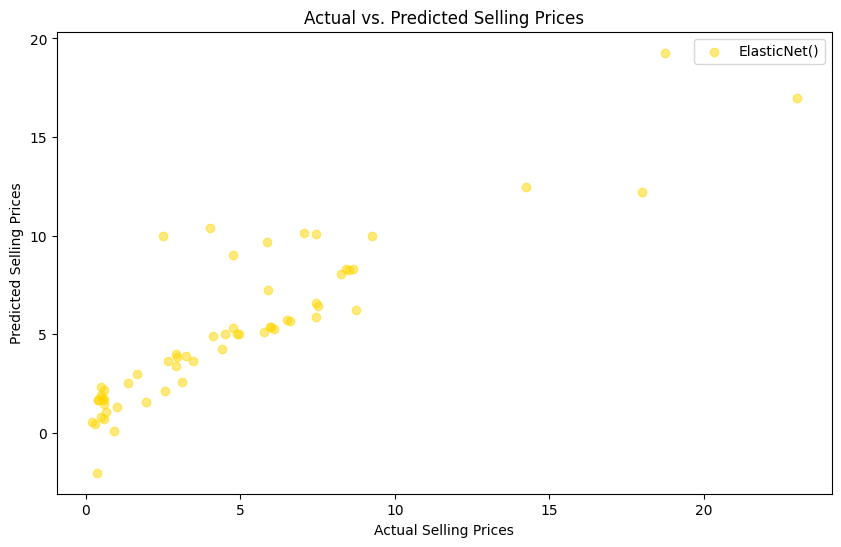

In [59]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_5, label=model_5, alpha=0.5, color='gold')

plt.xlabel("Actual Selling Prices")
plt.ylabel("Predicted Selling Prices")
plt.title("Actual vs. Predicted Selling Prices")
plt.legend()
plt.show()

#### (F) -> (i) Training using the Gradient Boosting Regression Model

In [60]:
model_6 = GradientBoostingRegressor() 
model_6.fit(x_train, y_train) 

GradientBoostingRegressor()

#### (ii) Predicting using the Gradient Boosting Regression Model

In [61]:
y_pred_6 = model_6.predict(x_test)

#### (iii) Evaluating the performance of Gradient Boosting Regression Model

In [62]:
mse = mean_squared_error(y_test, y_pred_6)
r2 = r2_score(y_test, y_pred_6)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 1.1721044289436058
R-Squared score is : 0.9458774223395812


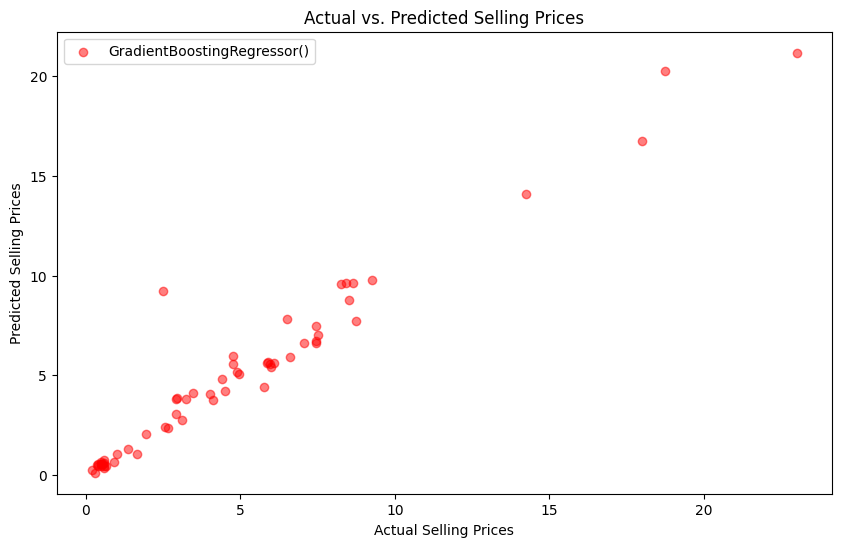

In [63]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_6, label=model_6, alpha=0.5, color='red')

plt.xlabel("Actual Selling Prices")
plt.ylabel("Predicted Selling Prices")
plt.title("Actual vs. Predicted Selling Prices")
plt.legend()
plt.show()

#### (G) -> (i) Training using the XGBoost Regression Model

In [64]:
model_7 = XGBRegressor()
model_7.fit(x_train, y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### (ii) Predicting using the XGBoost Regression Model

In [65]:
y_pred_7 = model_7.predict(x_test)

#### (iii) Evaluating the performance by XGBoost Regression Model

In [66]:
mse = mean_squared_error(y_test, y_pred_7)
r2 = r2_score(y_test, y_pred_7)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 1.3420081045453978
R-Squared score is : 0.9380320250776355


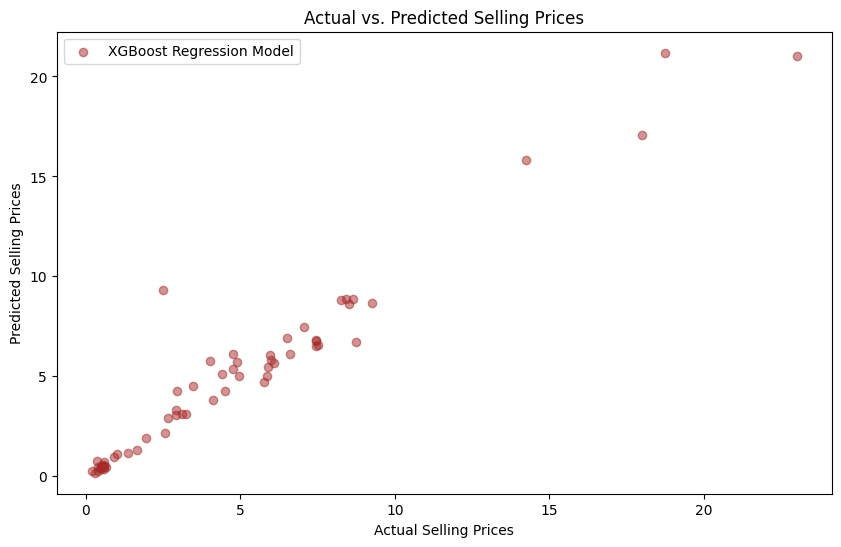

In [67]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_7, label='XGBoost Regression Model', alpha=0.5, color='brown')

plt.xlabel("Actual Selling Prices")
plt.ylabel("Predicted Selling Prices")
plt.title("Actual vs. Predicted Selling Prices")
plt.legend()
plt.show()

In [68]:
print("R-Squared score of each Model:- ")
print("\n Linear Regression Model: ",r2_score(y_test, y_pred_1))
print("\n Random Forest Regression Model: ",r2_score(y_test, y_pred_2))
print("\n Ridge Regression Model: ",r2_score(y_test, y_pred_3))
print("\n Lasso Regression Model: ",r2_score(y_test, y_pred_4))
print("\n ElasticNet Regression Model: ",r2_score(y_test, y_pred_5))
print("\n Gradient Boosting Regression Model: ",r2_score(y_test, y_pred_6))
print("\n XGBoost Regression Model: ",r2_score(y_test, y_pred_7))

R-Squared score of each Model:- 

 Linear Regression Model:  0.8157934269113378

 Random Forest Regression Model:  0.8883696328773287

 Ridge Regression Model:  0.8178851475150323

 Lasso Regression Model:  0.7882551945271251

 ElasticNet Regression Model:  0.7945948318165151

 Gradient Boosting Regression Model:  0.9458774223395812

 XGBoost Regression Model:  0.9380320250776355


### 6. Saving the Model having the best fit
### In our case it's XGBoost Regression Model with R^2 Score of 0.9031

Mean Square Error is : 1.3420081045453978
R-Squared score is : 0.9380320250776355


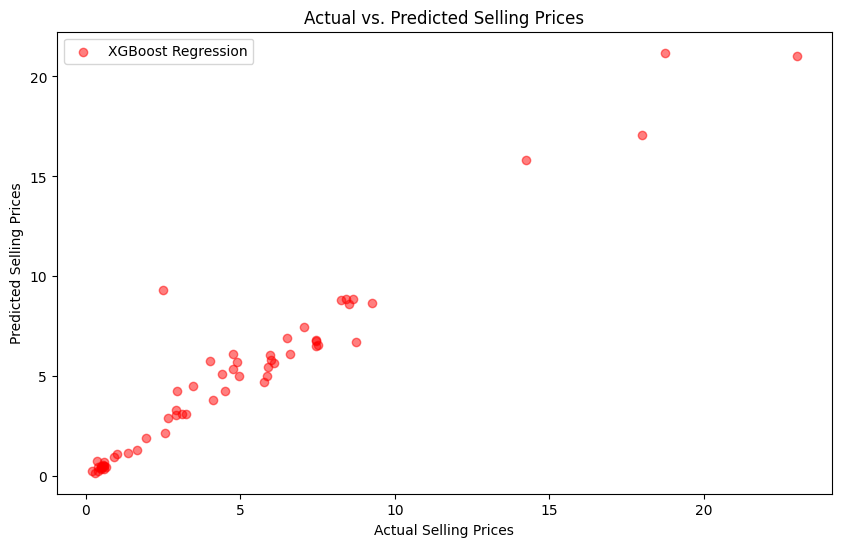

In [69]:
final_model =  XGBRegressor() 
final_model.fit(x_train, y_train) 
y_pred_final = final_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred_final)
r2 = r2_score(y_test, y_pred_final)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_final, label='XGBoost Regression', alpha=0.5, color='red')

plt.xlabel("Actual Selling Prices")
plt.ylabel("Predicted Selling Prices")
plt.title("Actual vs. Predicted Selling Prices")
plt.legend()
plt.show()